# Personal preprocessing
* product_category
* product_subcategory 
* product_modelname 

In [1]:
pwd

'c:\\Users\\승범 pc\\Desktop\\공부\\딥러닝\\엘지에이머스'

In [2]:
cd phase2_module/

c:\Users\승범 pc\Desktop\공부\딥러닝\엘지에이머스\phase2_module


In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def set_up(mode= None):
    pd.set_option('display.max_rows', mode)
# pd.options.display.max_rows = 60
set_up()

In [4]:
df_train = pd.read_csv("data/train.csv") # 학습용 데이터
df_test = pd.read_csv("data/test.csv") # 테스트 데이터(제출파일의 데이터)

# 데이터 계수 파악
len(df_train), len(df_test)

(59299, 5271)

## 신규 Columns 추가
---
* 밴 다이어그램을 통한 분류화
* 사람의 관심도를 표현하기 위해서 `customer_interest`로 명명.


In [5]:
def label_rows(row):
    if row['product_modelname'] is np.nan and row['product_subcategory'] is np.nan and row['product_category'] is np.nan:
        return 8
    elif row['product_modelname'] is np.nan and row['product_subcategory'] is np.nan:
        return 7
    elif row['product_modelname'] is np.nan and row['product_category'] is np.nan:
        return 6
    elif row['product_subcategory'] is np.nan and row['product_category'] is np.nan:
        return 5
    elif row['product_modelname'] is np.nan:
        return 4
    elif row['product_subcategory'] is np.nan:
        return 3
    elif row['product_category'] is np.nan:
        return 2
    else:
        return 1

df_train['customer_interest'] = df_train.apply(lambda row: label_rows(row), axis=1)
df_train[['product_modelname', 'product_subcategory', 'product_category']] = df_train[['product_modelname', 'product_subcategory', 'product_category']].fillna('Unknown') # 그 후 널값 채우기

## 결과

In [6]:
df_train.groupby('customer_interest')['is_converted'].mean()

customer_interest
1    0.147267
2    0.087719
3    0.102041
4    0.145729
5    0.005242
6    0.117021
7    0.076323
8    0.064555
Name: is_converted, dtype: float64

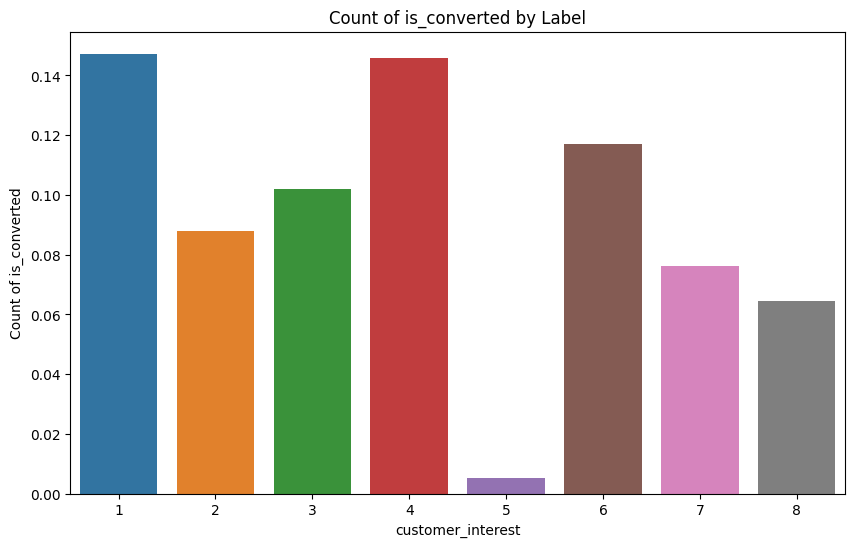

In [7]:
label_converted_count = df_train.groupby('customer_interest')['is_converted'].mean().reset_index()

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
sns.barplot(x='customer_interest', y='is_converted', data=label_converted_count)
plt.xlabel('customer_interest')
plt.ylabel('Count of is_converted')
plt.title('Count of is_converted by Label')
plt.show()

## product_category 정리
* LG BTB 마케팅의 입력 양식을 참고
* 종류

In [8]:
df_train['product_category'] = df_train['product_category'].str.lower().str.strip()
df_train['product_subcategory'] = df_train['product_subcategory'].str.lower().str.strip()
df_train['product_modelname'] = df_train['product_modelname'].str.lower().str.strip()

In [9]:
# washing machine 추가
mask = df_train['product_category'] == 'commercial tv,projector'
copy_df = df_train[mask].copy()
copy_df['product_category'] = 'projector'
# 원본 데이터 프레임에 데이터 추가 
df_train = pd.concat([df_train, copy_df])

# dryer 추가
mask = df_train['product_category'] == 'commercial tv,projector'
copy_df = df_train[mask].copy()
copy_df['product_category'] = 'commercial tv'
df_train = pd.concat([df_train, copy_df])

# 원본데이터 삭제.
df_train = df_train[df_train['product_category'] != 'commercial tv,projector']

In [10]:
# washing machine 추가
mask = df_train['product_category'] == 'washing machine,dryer'
copy_df = df_train[mask].copy()
copy_df['product_category'] = 'washing machine'
# 원본 데이터 프레임에 데이터 추가 
df_train = pd.concat([df_train, copy_df])

# dryer 추가
mask = df_train['product_category'] == 'washing machine,dryer'
copy_df = df_train[mask].copy()
copy_df['product_category'] = 'dryer'
df_train = pd.concat([df_train, copy_df])

# 원본데이터 삭제.
df_train = df_train[df_train['product_category'] != 'washing machine,dryer']

In [11]:
replacement_dict = {
    'interactive signage': 'interactive digital board',    'education createboard': 'interactive digital board',
    '互動式顯示屏': 'interactive digital board',    'multi inverter': 'multi-split',
    'multi split' : 'multi-split',    'video wall': 'video wall signage',
    'videowall_rmk': 'video wall signage',    '43us660h0sd.awz': 'hotel tv',   'residential air conditioner': 'rac',
    'aire acondicionado residencial': 'rac',    'ar condicionado residencial' : 'rac',
    'all lg vrf systems': 'vrf',    'ur640': 'ur640s',    'idb': 'interactive digital board',
    'id': 'interactive digital board',    'others': 'etc.',
    'other': 'etc.',    'lainnya': 'etc.',
    'otros': 'etc.',    'sales inquiry': 'etc.',    'commercial tv,tv': 'commercial tv',
    'monitor signage,commercial tv': 'commercial tv',    'onequick series': 'one:quick',
    'lg one:quick': 'one:quick',    'led 顯示屏': 'led signage',
    '32lq621cbsb.awz': 'smart tv signage',    'monitor signage,commercial tv,monior/monitor tv': 'monitor signage,monior/monitor tv',
    'monior/monitor tv,tv': 'monitor signage,monior/monitor tv',    'monitor signage,tv': 'monitor signage,monior/monitor tv',
    'monior/monitor tv,pc': 'monitor signage,monior/monitor tv',    'monitor signage,pc': 'monitor signage,monior/monitor tv',
    'isıtma': 'heating',    'calefacción': 'heating',    'ogrzewanie (pompy ciepła)' : 'heating',
    'standalone': 'commercial tv',    'system ac': 'single-split',  
    'điều hòa trung tâm multi': 'single-split',
    'sac' : 'single-split',    'fhd series': 'standard signage',
    'tv signage': 'standard signage',    'oled 顯示屏': 'oled signage',
    'מזגנים למקום מגורים': 'rac',    'htv': 'commercial tv',
    'led': 'led signage',   
    'vrf,multi-split': 'multi-split',   
    'soğutucu': 'single-split',    '標準顯示屏': 'led signage',    'monitor signage,monior/monitor tv' : 'monitor',
    'teto ou cassete inverter' : 'single-split',    'one quick:flex' : 'one:quick',
    'تكييف وتبريد' : 'single-split',    'comercial tv' : 'commercial tv',    'تكييفات' : 'single-split',    'مبرد (تشيلر)' : 'single-split',
    'חימום' : 'heating',    'ฯลฯ' : 'etc.',    'vb.' : 'etc.',    'videwall' : 'video wall signage',    'videowall signage' : 'video wall signage',
    'hospitality' : 'hotel tv',    'signage' : 'etc.',    'aquecimento' : 'heating',    'laec015' : 'one:quick',    'climatiseur résidentiel' : 'single-split',
    'khác' : 'etc.',    '醫院電視' : 'hospital tv',    '酒店電視' : 'hotel tv',    'เครื่องปรับอากาศเผื่อที่อยู่อาศัย' : 'single-split',
    'điều hòa gia dụng' : 'single-split',    'ac rumah' : 'single-split',    'điều hòa cục bộ' : 'single-split',
    'آخر' : 'etc.',    'bu50nst' : 'projector',    'window facing display' : 'outdoor_led',    '軟體' : 'software solution',
    'حلول التدفئة' : 'heating',    '高亮度顯示屏' : 'curvable_oled',    '特別顯示屏' : 'special signage',
    'פיצול מרובה' : 'multi-split',    'אחר' : 'etc.',    'split tunggal' : 'single-split',
    'radiology displays' : 'medical display',    'inne' : 'inne', 'leadallin':'others'
}

# 필터 안에 순서가 매우 중요.
filter1 = {
    'interactive' : 'interactive digital board',
    'vrf' : 'vrf','multi-split' : 'multi-split', 'single' : 'single-split', 'air conditioner' : 'single-split',
    'video wall' : 'video wall signage', 'chiller' : 'chiller',    'hotel tv' : 'hospitality_tv', 'pro:centric' : 'hospitality_tv',
    'hospital tv' : 'hospitality_tv',    'smart tv signage' : 'hospitality_tv',    'smart' : 'hospitality_tv',    'standard' : 'standard signage',
    'outros' : 'heating', 'brightness' : 'high brightness signage',
    'one:quick' : 'one:quick',    
    'one quick' : 'one:quick',    
    'medical' : 'medical display',    
    'system ac' : 'single-split',
    'commercial tv' : 'commercial tv',    
    'multi v' : 'multi v',    'monitor' : 'monitor',    'projector' : 'projector',
    'centric' : 'pro:centric',    'cloud' : 'cloud device',    'ess' : 'ess',    'energy' : 'ess',    'robot' : 'robot',
    'pc' : 'pc',    'tv' : 'tv',    'air' : 'single-split',    'ur640s' : 'standard signage',    'autre' : 'etc.',
    '.bwz' : 'hospitality_tv',    'laec' : 'ledallinone',    'vm5' : 'video wall signage',    'vl5' : 'video wall signage',
    'svh7' : 'video wall signage',    '28mq780' : 'ultrawide monitor',    'gsc' : 'outdoor_led',    'out_door' : 'outdoor_led',
    'care solution' : 'signage care solution',
    'system ac' : 'single-split', 'rac' : 'single-split','allinone_rmk' : 'others',
    'magnit' : 'magnit display',    '49xf' : 'high brightness signage',    'stretch' : 'high brightness signage',    ' pol' : 'hospitality_tv',
    'us660' : 'hospitality_tv',    'hoteleria' : 'hospitality_tv',    'single' : 'single-split',    'lsca' : 'indoor led',    'tc3d' : 'interactive digital board',
    'uh' : 'standard signage',    'washing' : 'washer',    '110' : 'standard signage', 'etc' : 'others', 'accessories':'others',
    }


In [12]:
cate_num_dict = {
    0 : 'commercial_display',    1 : 'hvac',    2 : 'it_products',    3 : 'commercial_laundry',   4 : 'robot',  5: 'others', -1 : 'non_serviced',
}


cate_dict  = {
    'interactive digital board' : 0, 'vrf' : 1, 'multi-split' : 1, 'hospitality_tv' : 0,
    'video wall signage': 0, 'led signage' : 0, 'single-split' : 1,
    'oled signage' : 0, 'chiller' : 1, 'standard signage' : 0,
    'medical display' : 2,    'one:quick' : 0,    'heating' : 1,    'high brightness signage' : 0,
    'ventilation' : 0,    'control' : -1,    'aircare' : -1,    'software solution' : 0,
    'special signage' : 0, 'webos' : 0,    'pc' : 2, 'projector' : 2, 'commercial display' : 0, 'outros' : 1,
    'signage care solution' : 0,    'multi v' : 1, 'cloud device' : 2,
    'laptop' : 2,    'a thermodynamic water heater' : 1,
    'monitor' : 2,    'virtual production' :  0,    'ogrzewanie (pompy ciepła)' : 1,
    'commercial tv' : 0,    'digital signage' : 0,    'ess': 1,    'ledallinone' : 0,    'ultrawide monitor' : 2,    'tv' : 0,
    'washing machine' : 3,    'dryer' : 3,    'aircare' : -1,    'robots' : 4, 'robot': 4, 'error' : -1,
    '' : -1,    'signage' : 0,    'transparent oled' : 0,    'ultra stretch' : 0, 'washer' : 3,
    'outdoor_led' : 0,    'lcd signage' : 0,    'curvable_oled' : 0,    'indoor led' : 0, 'technical support':-1, 'services' :-1, 
    'magnit display' : 0,
    'others' : 5,
}

subcate_dict = {
    'interactive digital board' : 'digital_signage','standard signage' : 'digital_signage', 'one:quick' : 'digital_signage',     'special signage' : 'digital_signage',
    'multi-split' : 'commercial_solutions', 'a thermodynamic water heater' : 'residential_solutions', 'heating': 'residential_solutions',  
    'video wall signage' : 'digital_signage','high brightness signage' : 'digital_signage',
    'led signage' : 'led_signage', 'indoor led' : 'led_signage',     'ledallinone' : 'led_signage', 'virtual production' : 'led_signage',
    'vrf' : 'commercial_solutions',  'single-split' : 'commercial_solutions', 'multi v' : 'commercial_solutions', 
    'ventilation' : 'commercial_solutions', 'chiller' : 'commercial_solutions',
    'oled signage' : 'oled_signage',
    'medical display' : 'medical_display',   
    'control' : 'non_serviced',
    'software solution' : 'software', 
    'hospitality_tv' : 'commercial_tv', 
    'webos' : 'software',    'projector' : 'projector',
    'outros' : 'residential_solutions',  
    'signage care solution' : 'software',
    'cloud device' : 'cloud_device',
    'laptop' : 'laptop',
    'washer' : 'washer',
    'monitor' : 'monitor',
    'commercial tv' : 'commercial_tv', 'tv' : 'commercial_tv',
    'digital signage' : 'digital_signage',
    'ess' : 'ess',
    'ultrawide monitor' : 'monitor',
    'washing machine' : 'washer',
    'dryer' : 'dryer',  
    'transparent oled' : 'oled_signage',
    'ultra stretch' : 'digital_signage',   
    'outdoor_led' : 'led_signage',
    'lcd_signage' : 'digital_signage',   
    'curvable_oled' : 'oled_sigange',  
    'pc' : 'laptop',
    'others' : 'others',
    'robot' : 'robot',
    'technical support' : 'technical support',
    'services' : 'services',
    'magnit display': 'led_signage'
}

subsubcate_dict = {
    'interactive digital board' : 'interactive',    'video wall signage' : 'video_wall',
    'led signage' : 'all', 'oled signage' : 'all',
    'single-split' : 'single_split',    'chiller' : 'chiller',
    'standard signage' : 'standard',    'one:quick' : 'one:quick',
    'ventilation' : 'ventilation_solution(erv)',    'control' : 'non_serviced',
    'software solution' : 'supersign_software',    'special signage' : 'special', 'projector' : 'all',
    'hospitality_tv' : 'hospitality_tv', 'tv': 'all',
    'webos' : 'webos','medical display' :'all',
    'signage care solution' : 'signage_care_solution',  
    'virtual production' : 'virtual_production',    'multi v' : 'vrf_system',
    'vrf' : 'vrf_system',    'outros' : 'air_to_water_heat_pumps',
    'laptop' : 'gram',    'ogrzewanie (pompy ciepła)' : 'air_to_water_heat_pumps',
    'ledallinone' : 'all_in_one',    'ultrawide monitor' : 'ultrawide',
    'heating': 'air_to_water_heat_pumps',    'a thermodynamic water heater' : 'water_heater',
    'transparent oled' : 'transparent_oled',    'ultra stretch' : 'ultra_stretch',
    'outdoor_led' : 'outdoor_led',    'lcd_signage' : 'lcd_signage',
    'curvable_oled' : 'curvable_oled',    'high brightness signage' : 'high_brightness_signage',
    'indoor led' : 'indoor_led', 'multi-split' : 'multi_split', 'monitor' : 'all', 'pc' : 'gram', 'others' : 'others', 'robot': 'robot', 'services': 'services',
    'technical support' : 'technical support', 'magnit display' : 'indoor_led', 'cloud device' : 'all',
}

* interactive signage = interactive digitalborad
* rac가 안보이니깐 일단 패스
* accessories : 일일히 분해 필요.
* technical support	: 기술적 지원...? 그리고 services 비슷한 국가에서 행동,

## 같은 Category의 경우 대체

In [13]:
data = df_train[['product_category','product_subcategory', 'product_modelname','customer_interest']].copy()

data["product_category"] = data["product_category"].replace(replacement_dict).str.replace("solar,", "")

data["mapped"] = data["product_category"].apply(
lambda x: next((v for k, v in filter1.items() if k in x), x)
)
category_counts = data["mapped"].value_counts()
categories_to_replace = category_counts[category_counts < 6].index.tolist()  # 6개 미만 index 찾기
data['mapped'] = data['mapped'].apply(lambda x: 'others' if x in categories_to_replace else x)
data["category_1"] = data["mapped"].map(cate_dict)
data["category_1"] = data["category_1"].map(cate_num_dict)
data["category_2"] = data["mapped"].map(subcate_dict)
data["category_3"] = data["mapped"].map(subsubcate_dict)

# 8번 진행.
cond8 = (data['customer_interest'] == 8)
data.loc[cond8, ['category_1','category_2', 'category_3']] = data.loc[cond8, ['category_1', 'category_2', 'category_3']].fillna('Unknown')
data["cate_is_nan_all"] = (data[["category_1", "category_2", "category_3"]].isna().any(axis=1)) | (data[["category_1", "category_2", "category_3"]].apply(lambda row: 'all' in row.values, axis=1))
# 7번 진행.
cond7 = (data['customer_interest'] == 7)
data.loc[cond7, ['category_1','category_2', 'category_3']] = data.loc[cond7, ['category_1', 'category_2', 'category_3']].fillna('all')
data["cate_is_nan_all"] = (data[["category_1", "category_2", "category_3"]].isna().any(axis=1)) | (data[["category_1", "category_2", "category_3"]].apply(lambda row: 'all' in row.values, axis=1))
       

In [14]:
len(data['category_1'].value_counts()),len(data['category_2'].value_counts()),len(data['category_3'].value_counts())

(8, 22, 28)

## 중간 전처리 

* 1 : 3가지 정보 다 있는 경우
* 2 : product_category만 없음.
* 3 : product_subcategory 만 없음.
* 4 : product_modelname만 없음.
* 5 : product_modelname만 있음.
* 6 : product_subcategory만 있음.
* 7 : product_category만 있음.
    * 완료
    * 큰 범주니깐 모든게 가능하므로 all로 하기
* 8 : 모두 없음. -> 모두 언노운 처리.

In [50]:
six_replace_dict = {
    'category' : 'others',
    '其他' : 'others',
    'จอภาพเพื่อการวินิจฉัย' : 'diagnositc monitors',
    'channel partner done fts details in system' :'others'
}

six_contain_dict = {
    'set top box' : 'commercial_tv accessories',
    'all monitors'
    'all monitors' : 'all monitors',
    'smart cam' : 'commercial_tv accessories',
    'floor stand' : 'digital accessories',
    'ops player' : 'digital accessories',
    'webos box' : 'digital accessories',
    'curvature calibrator' : 'oled accessories',
    'all medical display' : 'all medical display',
    'diagnostic' : 'diagnostic monitors',
    'diagnostico': 'diagnostic monitors',
    'clinical' : 'clinical review monitor',
    'x-ray' : 'x_ray',
    'probeam' : 'probeam projector',
    'uhd signage' : 'standard_tv',
    'zero client' : 'zero clients',
    'cloud' : 'cloud devices',
    'all projectors' : 'all projectors',
    'transparent led' : 'transparent led',
    'transparent' : 'transparent',
    'indoor' : 'indoor led',
    'outdoor' : 'outdoor led',
    'stadium' : 'outdoor led',
    'centric' : 'hospitality_tv',
    'hospitality' : 'hospitality_tv',
    'smart tv' : 'hospitality_tv',
    'standard signage' : 'standard_tv',
    'flat oled' : 'flat oled signage',
    'wallpaper oled' : 'flat oled signage',
    'curvable oled' : 'curvable oled signage',
    'curvable ' : 'curvable oled signage',
    'cinema' : 'miraclass led',
    'miraclass' : 'miraclass led',
    'all-in-one' : 'indoor led',
    'compact' : 'indoor led',
    'oled pro monitor' : 'oled display',
    'oled pro' : 'oled display',
    'brightness' : 'high brightness',
    'window facing' : 'high brightness',
    'thin client' : 'thin client',
    'ultrafine display' : 'oled display',
    'ultrafine monitor' : 'ultrafine',
    'interactive' : 'interactive board',
    'createboard' : 'interactive board',
    'touch' : 'interactive board',
    'open frame' : 'high brightness',
    'ultra slim' : 'indoor led',
    'ultra-slim' : 'indoor led',
    'virtual production' : 'indoor led',
    'curve' : 'curve led',
    'curved' : 'curve led',
    'uhd tv' : 'standard_tv',
    'dxd' : 'x_ray',
    'premium' : 'outdoor led',
    'led bloc' : 'indoor led',
    'video wall' : 'video_wall',
    'video-wall' : 'video_wall',
    'webos' : 'webos',
    'ultra light' : 'outdoor led',
    'ultra-light' : 'outdoor led',
    'cinebeam' : 'cinebeam_projector',
    'digital floor' : 'indoor led',
    'flexible led' : 'indoor led',
    'versatile' : 'outdoor led',
    'eye-level' : 'outdoor led',
    'eye level' : 'outdoor led',
    'chirurgicaux' : 'surgical monitor',
    'ergonomic' : 'ergonomic monitors',
    'digital signage' : 'digital_signage',
    'surgical' : 'surgical monitor',
    'fine-pitch' : 'indoor led',
    'fine pitch' : 'indoor led',
    'magnit' : 'indoor led',
    'one:quick' : 'one_quick',
    'onequick' : 'one_quick',
    'one-quick' : 'one_quick',
    'uhd 4k monitor' : 'uhd 4k monitors',
    'ips monitor' : 'ips monitors',
    'cms' : 'cms',
    'supersign' :'cms',
    'laptop' : 'laptops',
    'other' : 'others',
    'etc' : 'others',
    'essential' : 'standard_tv',
    'floor' : 'indoor led',
    '透明' : 'transparent',
    'ทางคลินิก' : 'clinical review monitor',
    'all monitors' : 'all monitors',
    'lu640h' : 'standard_tv',
    'lt340c' : 'standard_tv',
    'se3ke' : 'standard_tv',
    'uh7f' : 'standard_tv',
    'sh7dd': 'standard_tv',
    'ut640' : 'standard_tv',
    'sm3g' : 'standard_tv',
    'sm5ke' : 'standard_tv',
    'uh5f-h' : 'indoor led',
    'tr3bf' : 'interactive board',
    'tr3dj' : 'interactive board',
    'ul3g ' :'interactive board',
    'tc3d' : 'interactive board',
    'tr3bg' : 'interactive board',
    'ta3e' : 'interactive board',
    'vl5f' : 'video_wall',
    'uh5f' : 'video_wall',
    'svh7f' : 'video_wall',
    'lv35a' : 'video_wall',
    'ut660h' : 'hospitality_tv',
    'lt660h' : 'hospitality_tv',
    'hotel' : 'hospitality_tv',
    'us660h' : 'hospitality_tv',
    'lt340h' : 'hospitality_tv',
    'us662h' : 'hospitality_tv',
    'ut672m' : 'hospitality_tv',
    'ultra stretch' : 'ultra_stretch',
    'medical' : 'all medical display',
    'monitor' : 'all monitors',
}

six_cate_dict = {
    'all monitors': ['it_products', 'monitor', 'all'],
    'commercial_tv accessories' : ['commercial_display','commercial_tv','accessories'],
    'digital accessories' : ['commercial_display','digital_signage','accessories'],
    'oled accessories' : ['commercial_display','oled_signage','curvable oled'],
    'monitors for graphics applications & video editing' : ['it_products', 'monitor', 'all'],
    'all medical display' : ['it_products', 'medical_display', 'all'],
    'all monitors' : ['it_products', 'monitors', 'all'],
    'digital_signage' : ['commercial_display','digital_signage','all'],
    'diagnostic monitors' : ['it_products', 'medical_display', 'diganostic'],
    'ergonomic monitors' : ['it_products', 'monitor', 'all'],
    'monitors with usb-c connection' : ['it_products', 'monitor', 'all'],
    'ips monitors' : ['it_products', 'monitor', 'ips'],
    'ultrawide™ monitors' : ['it_products', 'monitor', 'ultrawide'],
    'ultrafine' : ['it_products', 'monitor', 'ultrafine'],
    'uhd 4k monitors' : ['it_products', 'monitor', 'uhd4k'],
    'other' : ['others', 'others', 'others'],
    'others' : ['others', 'others', 'others'],
    'clinical review monitor' : ['it_products', 'medical_display', 'clinical_review'],
    'surgical monitor' : ['it_products', 'medical_display', 'surgical'],
    'laptops' : ['it_products', 'laptop', 'gram'],
    'probeam projector' : ['it_products', 'projector', 'probeam_projector'],
    'all projectors' : ['it_products', 'projector', 'all'],
    'zero clients' : ['it_products', 'cloud_device', 'zero_clients'],
    'cloud devices' : ['it_products', 'cloud_device', 'all'], 
    'transparent led' : ['commercial_display', 'led_signage', 'transparent_led_film'],
    'transparent' : ['commercial_display', 'oled_sigange', 'transparent_oled'],
    'hospitality_tv' : ['commercial_display','commercial_tv','hospitality_tv'],
    'outdoor led' : ['commercial_display','led_signage','outdoor_led'],
    'miraclass led' : ['commercial_display','led_signage','miraclass_led'],
    'indoor led' :  ['commercial_display','led_signage','indoor_led'],
    'oled display': ['commercial_display', 'oled_signage', 'oled_monitor'],
    'magnit display' : ['commercial_display', 'led_signage', 'indoor_led'],
    'high brightness' : ['commercial_display','digital_signage','high_brightness_signage'],
    'thin client' : ['it_products','cloud_device','thin_client'],
    'curvable oled signage' : ['commercial_display','oled_signage','curvable oled'],
    'curve led' : ['commercial_display','led_signage','curved_led'],
    'video_wall' : ['commercial_display','digital_signage','video_wall'],
    'interactive board' : ['commercial_display', 'digital_signage', 'interactive'],
    'cinebeam_projector' : ['it_products', 'projector', 'cinebeam_projector'],
    'standard_tv': ['commercial_display', 'digital_signage', 'standard'],
    'one_quick' : ['commercial_display', 'digital_signage', 'one:quick'],
    'webos' : ['commercial_display', 'software', 'webos'],
    'ultra_stretch' : ['commercial_display', 'digital_signage', 'ultra_stretch'],
    'cms' : ['commercial_display', 'software', 'supersign_software'],
    'x_ray': ['it_products', 'medical_display', 'x_ray'],
    'flat oled signage' : ['commercial_display', 'oled_signage', 'flat'],
    'thin_client' : ['it_products', 'cloud_device', 'thin_clients'],
}
def get_subcategory_dict(dictionary):
    cate1_dict, cate2_dict, cate3_dict = {},{},{}
    # mapping
    for key, value in dictionary.items():
        cate1_dict[key] = value[0]
        cate2_dict[key] = value[1]
        cate3_dict[key] = value[2]
    return(cate1_dict, cate2_dict, cate3_dict)

In [51]:
cond4 = (((data['customer_interest'] == 1) | (data['customer_interest'] ==2) | (data['customer_interest'] == 4) | (data['customer_interest'] == 6)) & data['cate_is_nan_all'] == True)
data.loc[cond4, "mapped"] = data.loc[cond4, "product_subcategory"].replace(six_replace_dict)
data.loc[cond4, "mapped"] = data.loc[cond4, "mapped"].apply(
    lambda x: next((v for k, v in six_contain_dict.items() if k in x), x)
)
sub_cate_dict, sub_subcate_dict, sub_subsubcate_dict = get_subcategory_dict(six_cate_dict)
data.loc[cond4, "category_1"] = data.loc[cond4, "mapped"].map(sub_cate_dict)
data.loc[cond4, "category_2"] = data.loc[cond4, "mapped"].map(sub_subcate_dict)
data.loc[cond4, "category_3"] = data.loc[cond4, "mapped"].map(sub_subsubcate_dict)
data["cate_is_nan_all"] = (data[["category_1", "category_2", "category_3"]].isna().any(axis=1)) | (data[["category_1", "category_2", "category_3"]].apply(lambda row: 'all' in row.values, axis=1))
data["cate_is_nan_all"].value_counts()

False    56110
True      3201
Name: cate_is_nan_all, dtype: int64

In [52]:
cond3 = (((data['customer_interest'] == 1) | (data['customer_interest'] == 2)| (data['customer_interest'] == 3) | (data['customer_interest'] == 5))& data["cate_is_nan_all"])

In [53]:
model_contain_dict = {
    'un880' : 'ultrafine',
    'bp95e' : 'ultrafine',
    '28mq' : 'ips monitors',
    '27bq' : 'ips monitors',
    'all medical display' : 'all medical displays', 
    'surgical' : 'surgical monitor',
    'diagnostic' : 'diagnostic monitors',
    'x-ray' : 'x_ray',
    'clinical' : 'clinical review monitor',
    'ltak' : 'transparent led',
    'lat' : 'transparent led',
    '21hq513d' : 'diagnostic monitors',
    '31hn713d' : 'diagnostic monitors',
    '34wq' : 'ultrawide™ monitors',
    'wn780' : 'ultrawide™ monitors',
    '65ep5g' : 'oled display',
    'lsa' : 'indoor led',
    'laec' : 'indoor led',
    'laeb' : 'indoor led',
    'laa0' : 'indoor led',
    'lscb' : 'indoor led',
    'lsca' : 'indoor led',
    'las0' : 'indoor led',
    'lsb' : 'indoor led',
    'lad033f' : 'miraclass led',    
    'ef5' : 'curve led',
    'gsca0' : 'outdoor led',
    'eg5' : 'flat oled signage',
    'ev5e' : 'flat oled signage',
    'ej5' : 'flat oled signage',
    'gscc' : 'outdoor led',
    'gscd' : 'outdoor led',
    'lbs' : 'outdoor led',
    'sc-00da' : 'one_quick',
    '55ct' : 'one_quick',
    '43ht' : 'one_quick',
    'ct5wj': 'one_quick',
    'st-43hf' : 'digital accessories',
    'lbs1' : 'outdoor led',
    'stb' : 'commercial_tv accessories',
    'lu640h' : 'standard_tv',
    'lt340c' : 'standard_tv',
    'se3ke' : 'standard_tv',
    'uh7f' : 'standard_tv',
    'sh7dd': 'standard_tv',
    'ut640' : 'standard_tv',
    'sm3g' : 'standard_tv',
    'sm5ke' : 'standard_tv',
    'uh5f-h' : 'indoor led',
    'lfcg' : 'indoor led',
    'lwbc' : 'indoor led',
    'tr3bf' : 'interactive board',
    'tr3dj' : 'interactive board',
    'ul3g ' :'interactive board',
    'tc3d' : 'interactive board',
    'tr3bg' : 'interactive board',
    'ta3e' : 'interactive board',
    'vl5f' : 'video_wall',
    'uh5f' : 'video_wall',
    'svh7f' : 'video_wall',
    'lv35a' : 'video_wall',
    'ut660h' : 'hospitality_tv',
    'lt660h' : 'hospitality_tv',
    'hotel' : 'hospitality_tv',
    'us660h' : 'hospitality_tv',
    'lt340h' : 'hospitality_tv',
    'us662h' : 'hospitality_tv',
    'ut672m' : 'hospitality_tv',
    'gmbd035' : 'outdoor led',
    'architect' : 'others',
    'ew5' : 'transparent',
    'um5j' : 'standard_tv',
    'lac0' : 'curve led',
    'ops' : 'ops player',
    'wp4' : 'webos box',
    'qp88d' : 'ips monitors',
    'cms' : 'cms',
    '24cn670' : 'thin_client',
    'ur series' : 'standard_tv',
    'ur640' : 'standard_tv',
    'un880' : 'ultrafine',
    'uq850' : 'ultrafine',
    'bp95' : 'ultrafine',
    'hk312' : 'clinical',
    'verticalbrochure' : 'others',
    'ai/machine learning | antennas, transmitters and towers | audience measurement | cameras and lenses' : 'others',
}


In [54]:
cond3 = (((data['customer_interest'] == 1) | (data['customer_interest'] == 2)| (data['customer_interest'] == 3) | (data['customer_interest'] == 5))& data['cate_is_nan_all'] == True)
data.loc[cond3, "mapped"] = data.loc[cond3, "product_modelname"].apply(
    lambda x: next((v for k, v in model_contain_dict.items() if k in x), x)
)
data.loc[cond3, "category_1"] = data.loc[cond3, "mapped"].map(sub_cate_dict)
data.loc[cond3, "category_2"] = data.loc[cond3, "mapped"].map(sub_subcate_dict)
data.loc[cond3, "category_3"] = data.loc[cond3, "mapped"].map(sub_subsubcate_dict)

In [55]:
data["cate_is_nan"] = (data[["category_1", "category_2", "category_3"]].isna().any(axis=1))

In [56]:
cond1 = data["cate_is_nan"] == True
data["mapped"] = data["product_category"].apply(
    lambda x: next((v for k, v in filter1.items() if k in x), x)
)
data.loc[cond1,["category_1"]] = data.loc[cond1,"mapped"].map(cate_dict)
data.loc[cond1,["category_1"]]= data.loc[cond1,"category_1"].map(cate_num_dict)
data.loc[cond1,["category_2"]] = data.loc[cond1,"mapped"].map(subcate_dict)
data.loc[cond1,["category_3"]] = data.loc[cond1,"mapped"].map(subsubcate_dict)

In [57]:
data["cate_is_nan"] = (data[["category_1", "category_2", "category_3"]].isna().any(axis=1))
cond1 = data["cate_is_nan"] == True

In [58]:
data.loc[cond1, "mapped"] = data.loc[cond1, "product_subcategory"].replace(six_replace_dict)
data.loc[cond1, "mapped"] = data.loc[cond1, "mapped"].apply(
            lambda x: next((v for k, v in six_contain_dict.items() if k in x), x)
        )
sub_cate_dict, sub_subcate_dict, sub_subsubcate_dict = get_subcategory_dict(six_cate_dict)
data.loc[cond1, "category_1"] = data.loc[cond1, "mapped"].map(sub_cate_dict)
data.loc[cond1, "category_2"] = data.loc[cond1, "mapped"].map(sub_subcate_dict)
data.loc[cond1, "category_3"] = data.loc[cond1, "mapped"].map(sub_subsubcate_dict)
data["cate_is_nan"] = (data[["category_1", "category_2", "category_3"]].isna().any(axis=1))

In [59]:
data[data['cate_is_nan']][['product_category','product_subcategory', 'product_modelname', 'category_1', 'category_2', 'category_3']]

,product_category,product_subcategory,product_modelname,category_1,category_2,category_3


In [60]:
from src.utils.manage_pkl_files import PickleManager as pkl_manager
path1 = 'product_category'
pkl_manager.save(path1, 'replacement_dict', replacement_dict)
pkl_manager.save(path1, 'subcate_dict', subcate_dict)
pkl_manager.save(path1, 'filter1', filter1)
pkl_manager.save(path1, 'cate_dict', cate_dict)
pkl_manager.save(path1, 'cate_num_dict', cate_num_dict)
pkl_manager.save(path1, 'subsubcate_dict', subsubcate_dict)

path2 = 'product_subcategory'
pkl_manager.save(path2, 'six_replace_dict', six_replace_dict)
pkl_manager.save(path2, 'six_contain_dict', six_contain_dict)
pkl_manager.save(path2, 'six_cate_dict', six_cate_dict)
pkl_manager.save(path2, 'model_contain_dict', model_contain_dict)
